# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('data/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

In [5]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [6]:
df_data.duplicated().any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [7]:
df_data.head(1)

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   

                                     Location                        Date  \
0  LC-39A, Kennedy Space Center, Florida, USA  Fri Aug 07, 2020 05:12 UTC   

                                         Detail Rocket_Status Price  \
0  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  StatusActive  50.0   

  Mission_Status  
0        Success

In [8]:
clean_data = df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [9]:
clean_data.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status Price Mission_Status  
0  StatusActive  50.0        Success

## Descriptive Statistics

In [10]:
clean_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [11]:
clean_data.describe()

Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<AxesSubplot:>

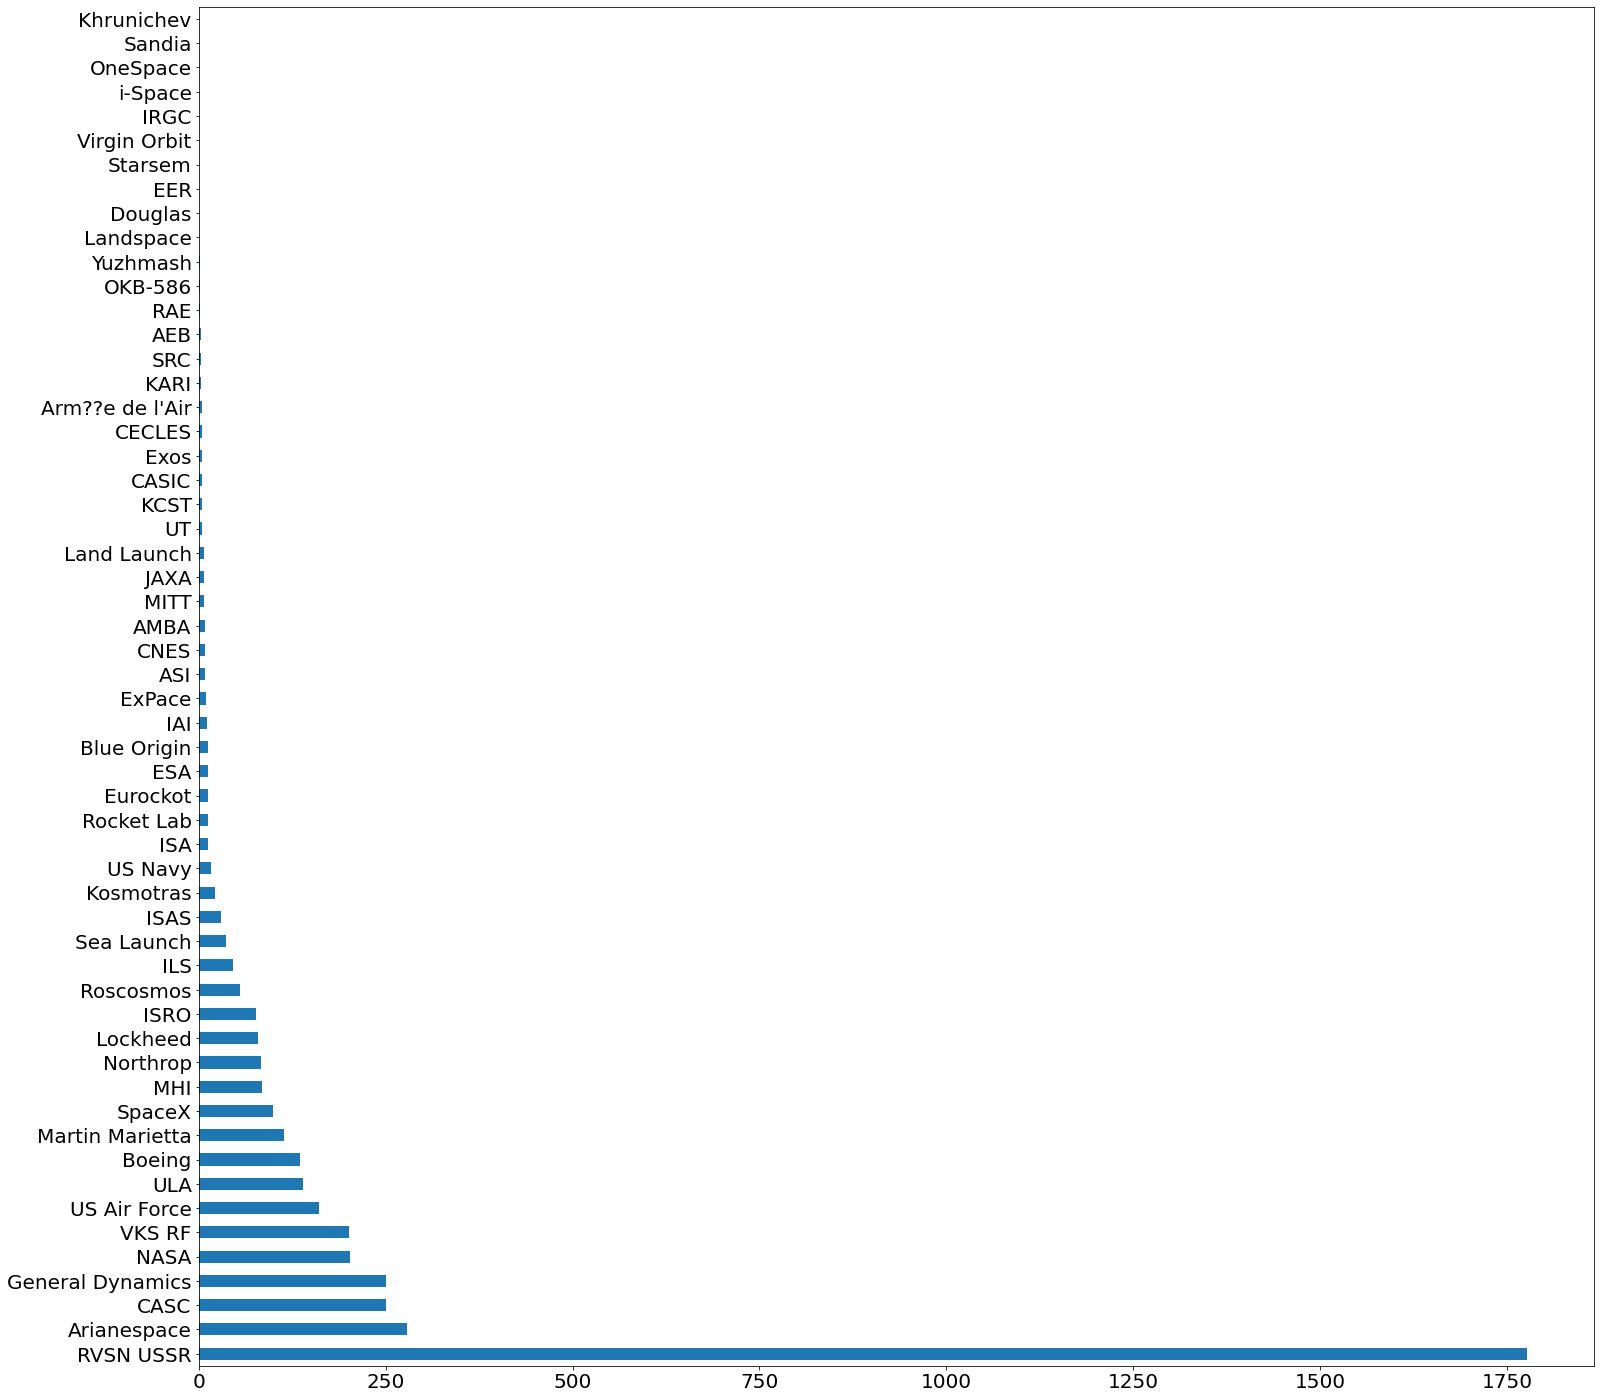

In [12]:
clean_data['Organisation'].value_counts().plot(kind='barh', fontsize=20, figsize=[25,25])

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [13]:
clean_data['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [14]:
clean_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [15]:
clean_data.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status Price Mission_Status  
0  StatusActive  50.0        Success

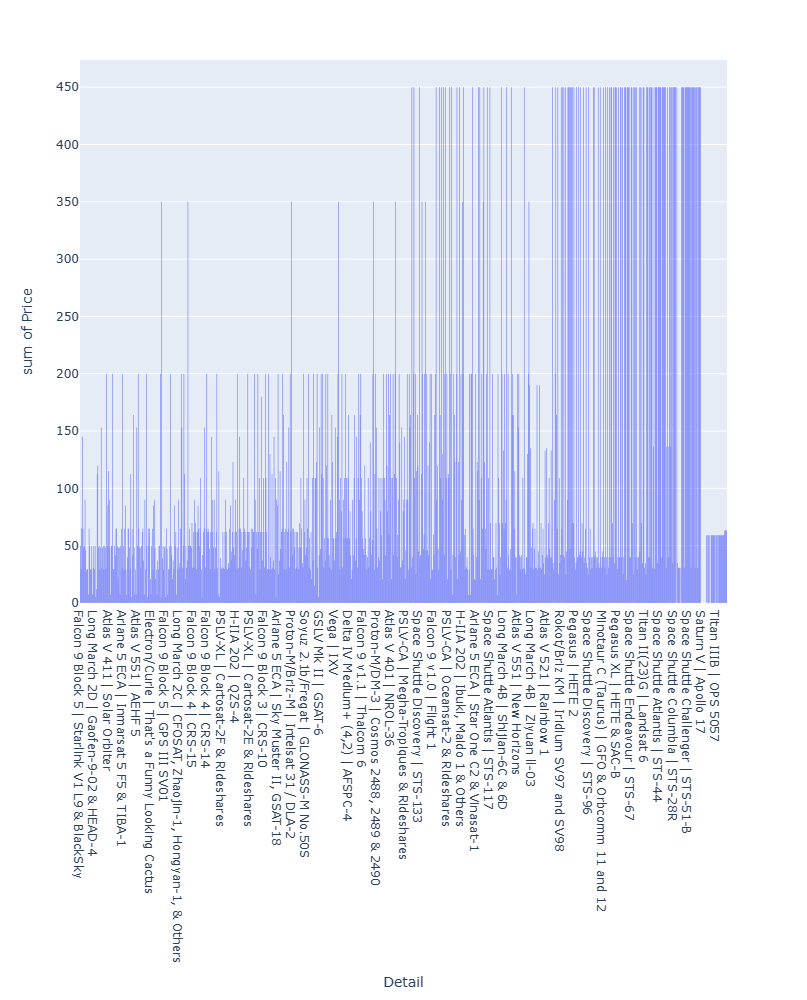

In [16]:
fig = px.histogram(clean_data.dropna(subset=['Price']), x="Detail", y='Price')
fig.update_layout(height=1000)
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [17]:
countries_to_merge = []
for location in clean_data.Location:
    country=''
    location = location.split(', ')[-1]
    if location == 'Russia':
        country='Russian Federation'
    elif location == 'New Mexico':
        country='USA'
    elif location == 'Yellow Sea':
        country='China'
    elif location == 'Iran':
        country='Iran, Islamic Republic of'
    elif location == 'Pacific Ocean':
        country='Russian Federation'
    elif location == 'North Korea':
        country='Korea, Democratic People\'s Republic of'
    elif location == 'Shahrud Missile Test Site':
        country='Iran, Islamic Republic of'
    elif location == 'Pacific Missile Range Facility':
        country='USA'
    elif location == 'Barents Sea':
        country='Russian Federation'
    elif location == 'Gran Canaria':
        country='USA'
    elif location == 'South Korea':
        country='Korea, Republic of'
    else:
        country=location
    countries_to_merge.append(countries.get(country).alpha3)

In [18]:
clean_data.insert(7,"Country", countries_to_merge)

In [19]:
clean_data.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status Price Mission_Status Country  
0  StatusActive  50.0        Success     USA

# Use a Choropleth Map to Show the Number of Failures by Country


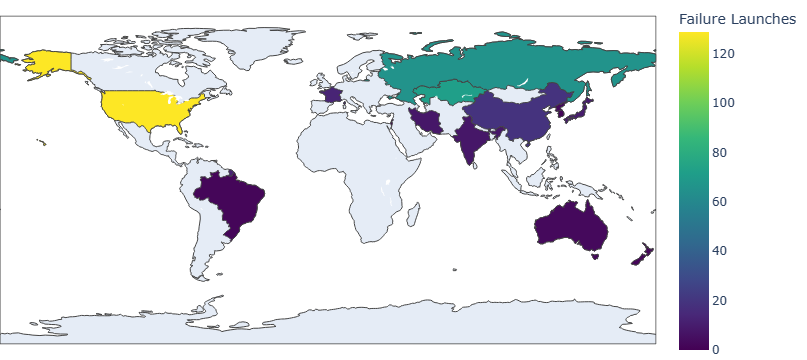

In [21]:
status = ['Failure']
df_to_map = clean_data[clean_data.Mission_Status.isin(status)].groupby('Country').count()
fig = px.choropleth(df_to_map, geojson=df_to_map.index, locations=df_to_map.index, color='Mission_Status',
                           color_continuous_scale="Viridis",
                           range_color=(0, 129),
                           scope="world",
                           labels={'Mission_Status':'Failure Launches'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

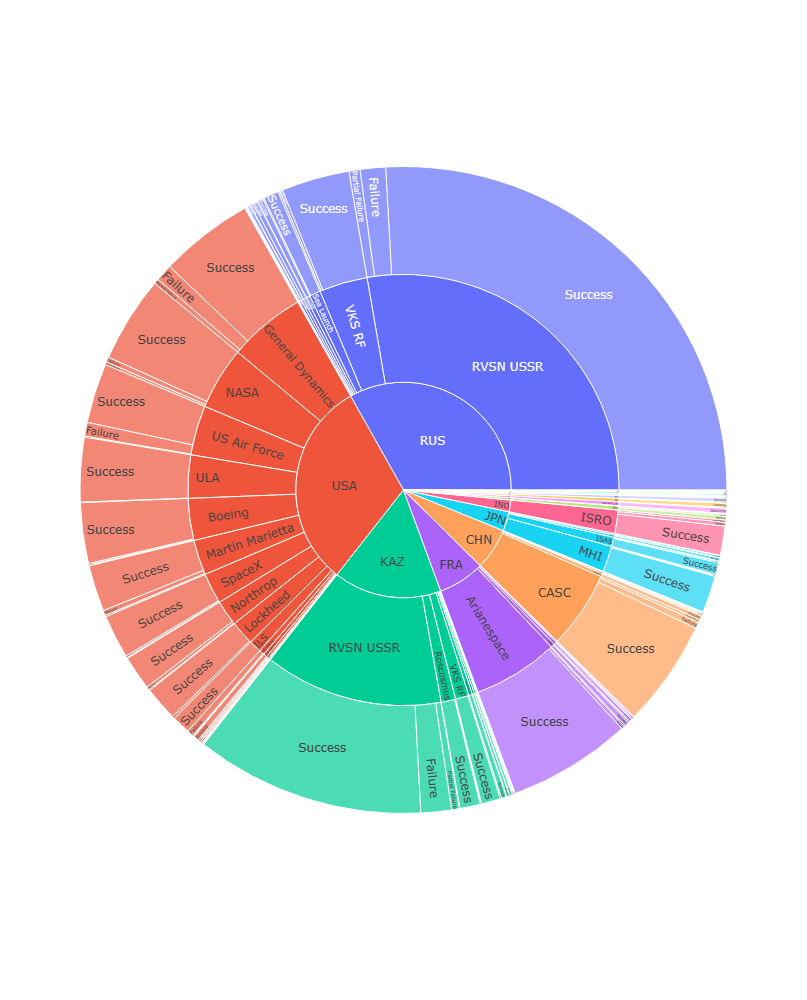

In [22]:
fig = px.sunburst(clean_data, path=['Country', 'Organisation', 'Mission_Status'])
fig.update_layout(height=1000)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [23]:
clean_data['Price'] = clean_data['Price'].str.replace(',', '').astype(float)

In [24]:
clean_data.groupby(by=['Organisation']).sum()

Price
Organisation              
AEB                   0.00
AMBA                  0.00
ASI                   0.00
Arianespace      16,345.00
Arm??e de l'Air       0.00
Blue Origin           0.00
Boeing            1,241.00
CASC              6,340.26
CASIC                 0.00
CECLES                0.00
CNES                  0.00
Douglas               0.00
EER                  20.00
ESA                  37.00
Eurockot            543.40
ExPace               28.30
Exos                  0.00
General Dynamics      0.00
IAI                   0.00
ILS               1,320.00
IRGC                  0.00
ISA                   0.00
ISAS                  0.00
ISRO              2,177.00
JAXA                168.00
KARI                  0.00
KCST                  0.00
Khrunichev            0.00
Kosmotras           638.00
Land Launch           0.00
Landspace             0.00
Lockheed            280.00
MHI               3,532.50
MITT                  0.00
Martin Marietta     721.40
NASA             76,280.00
Northrop          3,930.00
OKB-586               0.00
OneSpace              0.00
RAE                   0.00
RVSN USSR        10,000.00
Rocket Lab           97.50
Roscosmos         1,187.50
SRC                   0.00
Sandia               15.00
Sea Launch            0.00
SpaceX            5,444.00
Starsem               0.00
ULA              14,798.00
US Air Force      1,550.92
US Navy               0.00
UT                    0.00
VKS RF            1,548.90
Virgin Orbit         12.00
Yuzhmash              0.00
i-Space               0.00

# Analyse the Amount of Money Spent by Organisation per Launch

In [25]:
clean_data.groupby(by=['Organisation']).mean()

Price
Organisation             
AEB                   NaN
AMBA                  NaN
ASI                   NaN
Arianespace        170.26
Arm??e de l'Air       NaN
Blue Origin           NaN
Boeing             177.29
CASC                40.13
CASIC                 NaN
CECLES                NaN
CNES                  NaN
Douglas               NaN
EER                 20.00
ESA                 37.00
Eurockot            41.80
ExPace              28.30
Exos                  NaN
General Dynamics      NaN
IAI                   NaN
ILS                101.54
IRGC                  NaN
ISA                   NaN
ISAS                  NaN
ISRO                32.49
JAXA                56.00
KARI                  NaN
KCST                  NaN
Khrunichev            NaN
Kosmotras           29.00
Land Launch           NaN
Landspace             NaN
Lockheed            35.00
MHI                 95.47
MITT                  NaN
Martin Marietta     80.16
NASA               511.95
Northrop            47.35
OKB-586               NaN
OneSpace              NaN
RAE                   NaN
RVSN USSR        5,000.00
Rocket Lab           7.50
Roscosmos           51.63
SRC                   NaN
Sandia              15.00
Sea Launch            NaN
SpaceX              54.99
Starsem               NaN
ULA                151.00
US Air Force        59.65
US Navy               NaN
UT                    NaN
VKS RF              46.94
Virgin Orbit        12.00
Yuzhmash              NaN
i-Space               NaN

# Chart the Number of Launches per Year

In [26]:
clean_data.Date = pd.to_datetime(clean_data.Date)

In [27]:
clean_data.Date[0]

datetime.datetime(2020, 8, 7, 5, 12, tzinfo=tzutc())

In [28]:
years = []
for date in clean_data.Date:
    year = date.year
    years.append(year)
clean_data['Year'] = years

In [29]:
clean_data.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status  Price Mission_Status Country  Year  
0  StatusActive  50.00        Success     USA  2020

<AxesSubplot:xlabel='Year', ylabel='Launches'>

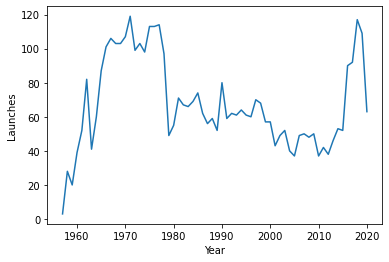

In [30]:
clean_data.groupby('Year').count().plot(y='Rocket_Status', ylabel='Launches', legend=False)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [31]:
months = []
for date in clean_data.Date:
    month = date.strftime("%B")
    months.append(month)
clean_data['Month'] = months

In [32]:
clean_data.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status  Price Mission_Status Country  Year   Month  
0  StatusActive  50.00        Success     USA  2020  August

<AxesSubplot:xlabel='Month', ylabel='Launches'>

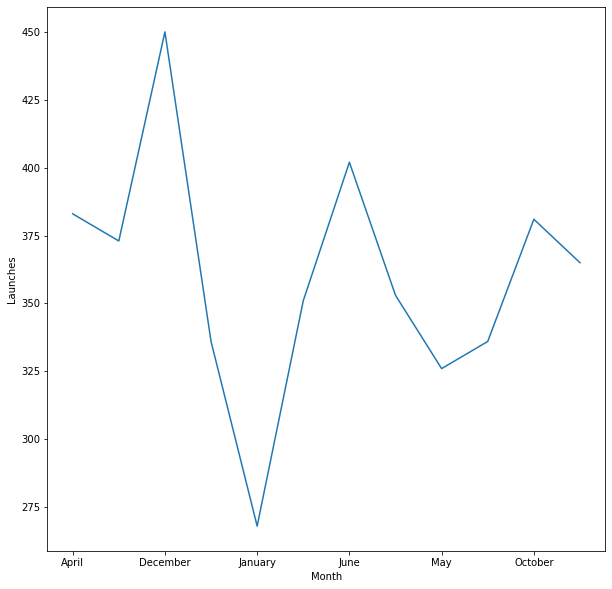

In [33]:
clean_data.groupby('Month').count().plot(y='Rocket_Status', ylabel='Launches', legend=False, figsize=(10,10))

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

<AxesSubplot:xlabel='Month', ylabel='Launches'>

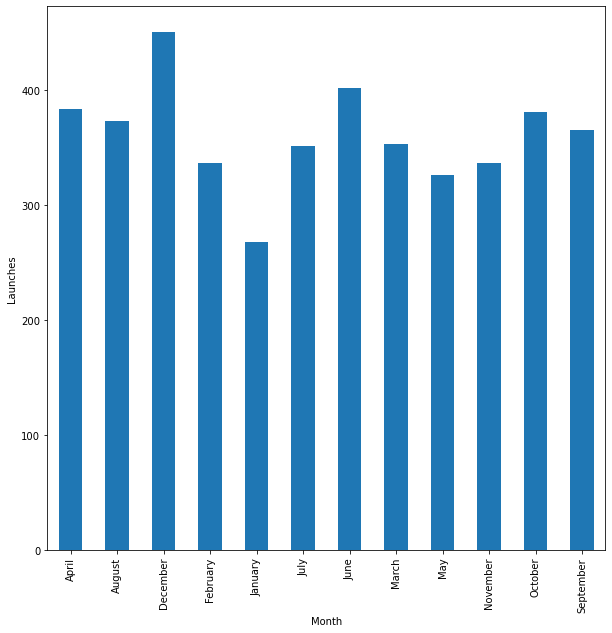

In [34]:
clean_data.groupby('Month').count().plot(y='Rocket_Status',
                                         ylabel='Launches',
                                         legend=False,
                                         figsize=(10,10),
                                         fontsize=10,
                                         kind='bar')

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

<AxesSubplot:xlabel='Year', ylabel='Average Price'>

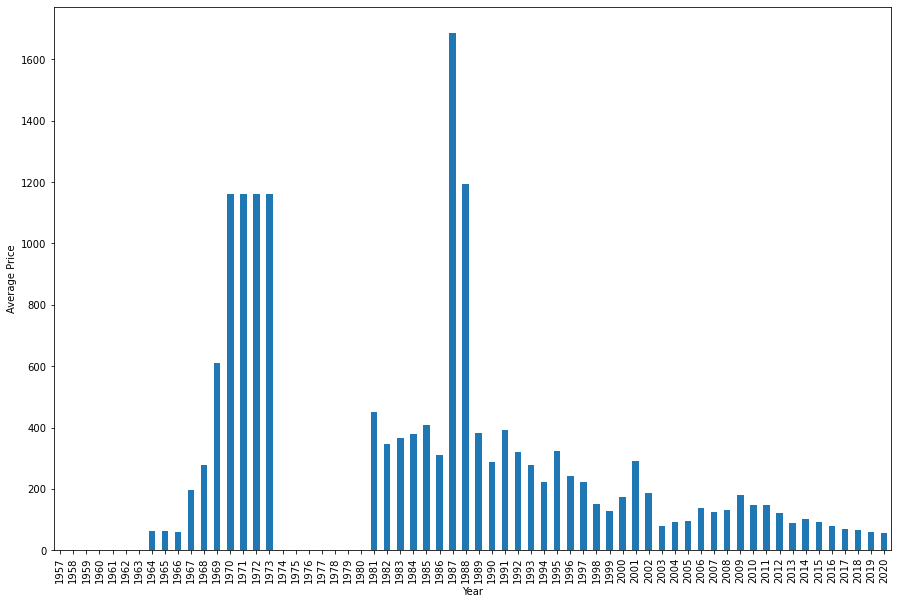

In [35]:
clean_data.groupby('Year').mean().plot(y='Price',
                                         ylabel='Average Price',
                                         legend=False,
                                         figsize=(15,10),
                                         fontsize=10,
                                         kind='bar')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [36]:
clean_data.groupby('Organisation').count().sort_values(by='Rocket_Status', ascending=False).head(10)

Location  Date  Detail  Rocket_Status  Price  \
Organisation                                                     
RVSN USSR             1777  1777    1777           1777      2   
Arianespace            279   279     279            279     96   
General Dynamics       251   251     251            251      0   
CASC                   251   251     251            251    158   
NASA                   203   203     203            203    149   
VKS RF                 201   201     201            201     33   
US Air Force           161   161     161            161     26   
ULA                    140   140     140            140     98   
Boeing                 136   136     136            136      7   
Martin Marietta        114   114     114            114      9   

                  Mission_Status  Country  Year  Month  
Organisation                                            
RVSN USSR                   1777     1777  1777   1777  
Arianespace                  279      279   279    279  
General Dynamics             251      251   251    251  
CASC                         251      251   251    251  
NASA                         203      203   203    203  
VKS RF                       201      201   201    201  
US Air Force                 161      161   161    161  
ULA                          140      140   140    140  
Boeing                       136      136   136    136  
Martin Marietta              114      114   114    114

<AxesSubplot:xlabel='Organisation', ylabel='Launches'>

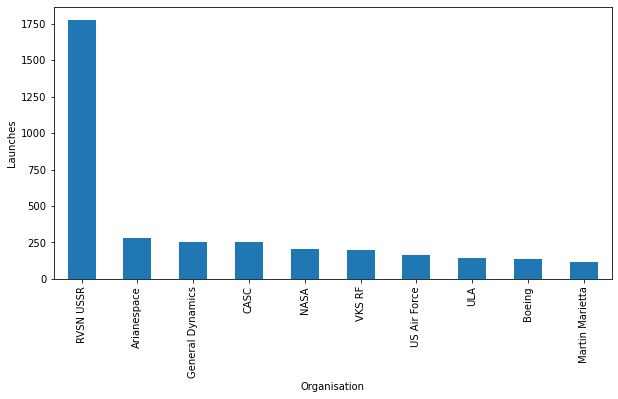

In [37]:
clean_data.groupby('Organisation').count().sort_values(by='Rocket_Status', ascending=False).head(10).plot(y='Rocket_Status',
                                                                                                          legend=False,
                                                                                                         figsize=(10,5),
                                                                                                          kind='bar',
                                                                                                          ylabel='Launches')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [38]:
cold_war_df = clean_data[clean_data.Year < 1991]

In [39]:
cold_war_df.head(2)

Organisation                                 Location  \
1776    RVSN USSR   Site 32/2, Plesetsk Cosmodrome, Russia   
1777    RVSN USSR  Site 133/3, Plesetsk Cosmodrome, Russia   

                           Date                            Detail  \
1776  1990-12-22 07:28:00+00:00   Tsyklon-3 | Cosmos 2114 to 2119   
1777  1990-12-10 07:54:00+00:00  Cosmos-3M (11K65M) | Cosmos 2112   

      Rocket_Status  Price Mission_Status Country  Year     Month  
1776  StatusRetired    NaN        Success     RUS  1990  December  
1777  StatusRetired    NaN        Success     RUS  1990  December

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

<AxesSubplot:ylabel='Launches'>

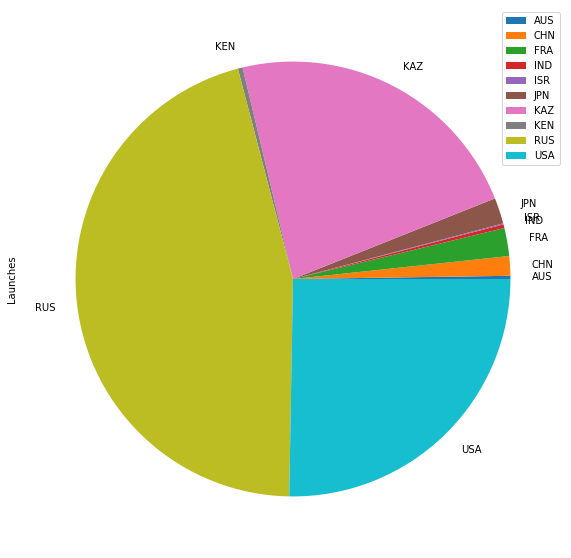

In [42]:
cold_war_df.groupby('Country').count().plot(y='Rocket_Status',
                                              legend=True,
                                             figsize=(20,10),
                                              kind='pie',
                                              ylabel='Launches')

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [43]:
usa_df = cold_war_df[cold_war_df.Country == 'USA'].groupby(['Year'])['Rocket_Status'].count()
rus_df = cold_war_df[cold_war_df.Country == 'RUS'].groupby(['Year'])['Rocket_Status'].count()

<AxesSubplot:xlabel='Year'>

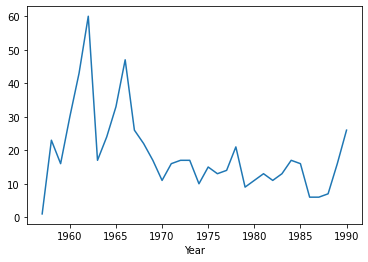

In [92]:
usa_df.plot()

<AxesSubplot:xlabel='Year'>

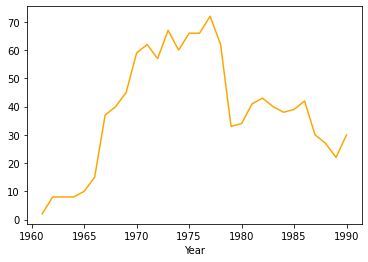

In [94]:
rus_df.plot(color='orange')

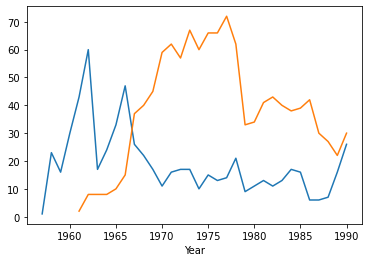

<Figure size 432x288 with 0 Axes>

In [90]:
ax = usa_df.plot(label='Country')
rus_df.plot(ax=ax)
plt.figure()
plt.show()

In [72]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

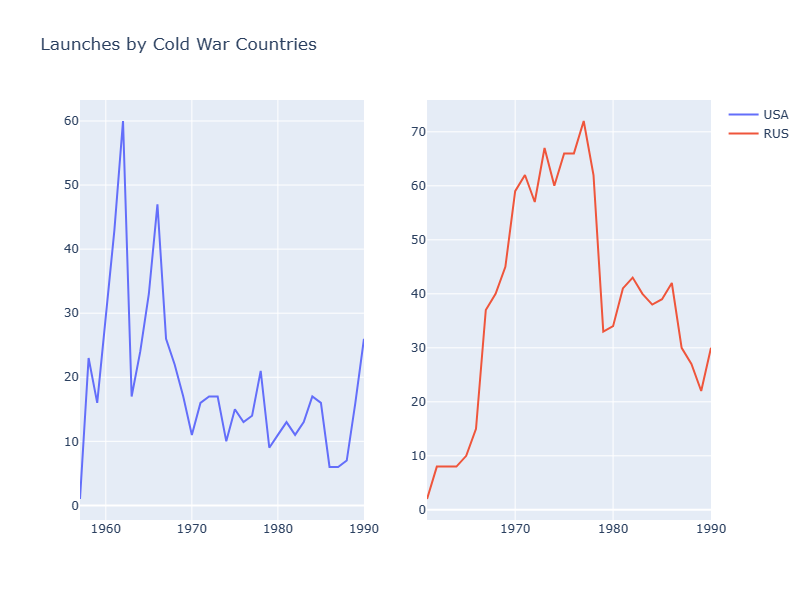

In [73]:
fig = make_subplots(rows = 1,cols = 2)

fig.add_trace(go.Scatter(x=usa_df.index, y=usa_df.values, name='USA'),
              row = 1,
              col = 1)

fig.add_trace(go.Scatter(x=rus_df.index, y=rus_df.values, name='RUS'),
              row = 1,
              col = 2)

fig.update_layout(height = 600,width = 800,title = "Launches by Cold War Countries")
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [74]:
fail_missions_df = clean_data[clean_data.Mission_Status != 'Success']

<AxesSubplot:title={'center':'Mission Failures Year on Year'}, xlabel='Year', ylabel='Failures'>

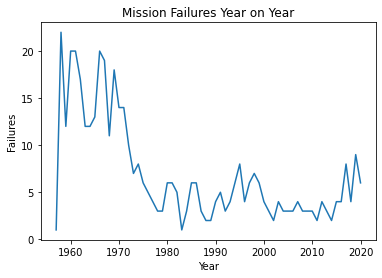

In [75]:
fail_missions_df.groupby('Year')['Rocket_Status'].count().plot(title='Mission Failures Year on Year',
                                                              ylabel='Failures')

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [76]:
fail_missions_df = clean_data[clean_data.Mission_Status != 'Success'].groupby('Year')['Rocket_Status'].count()

In [77]:
success_missions_df = clean_data[clean_data.Mission_Status == 'Success'].groupby('Year')['Rocket_Status'].count()

In [78]:
percentage_df = (fail_missions_df / (fail_missions_df + success_missions_df))*100

<AxesSubplot:title={'center':'Failure launches percentage over Time'}, xlabel='Year', ylabel='Failure Percentage(%)'>

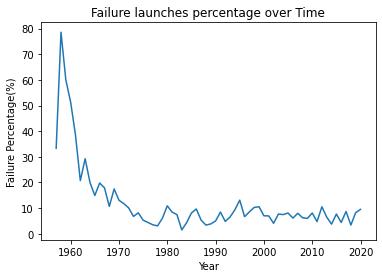

In [79]:
percentage_df.plot(title='Failure launches percentage over Time',
                  ylabel='Failure Percentage(%)')

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

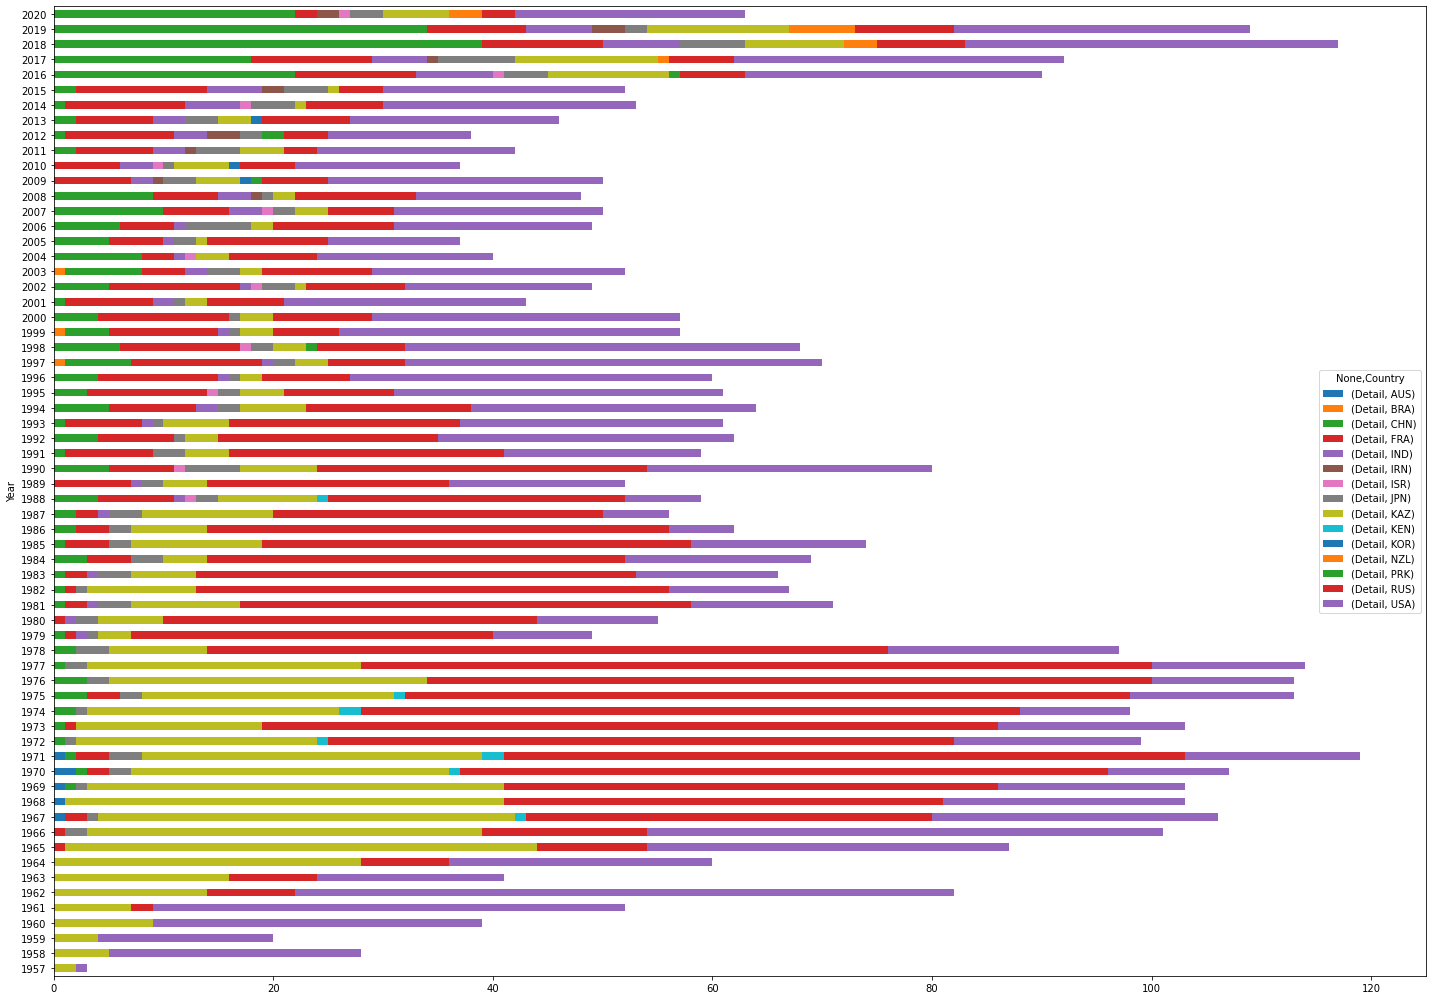

In [82]:
dfp = clean_data.pivot_table(index='Year',
                             columns='Country',
                             values=['Detail'],
                             aggfunc='count')

dfp.plot(kind='barh',
         subplots=False,
         rot=0,
         figsize=(20, 14),
         legend=True,
         ylabel='Launches',
         stacked=True)

plt.tight_layout()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

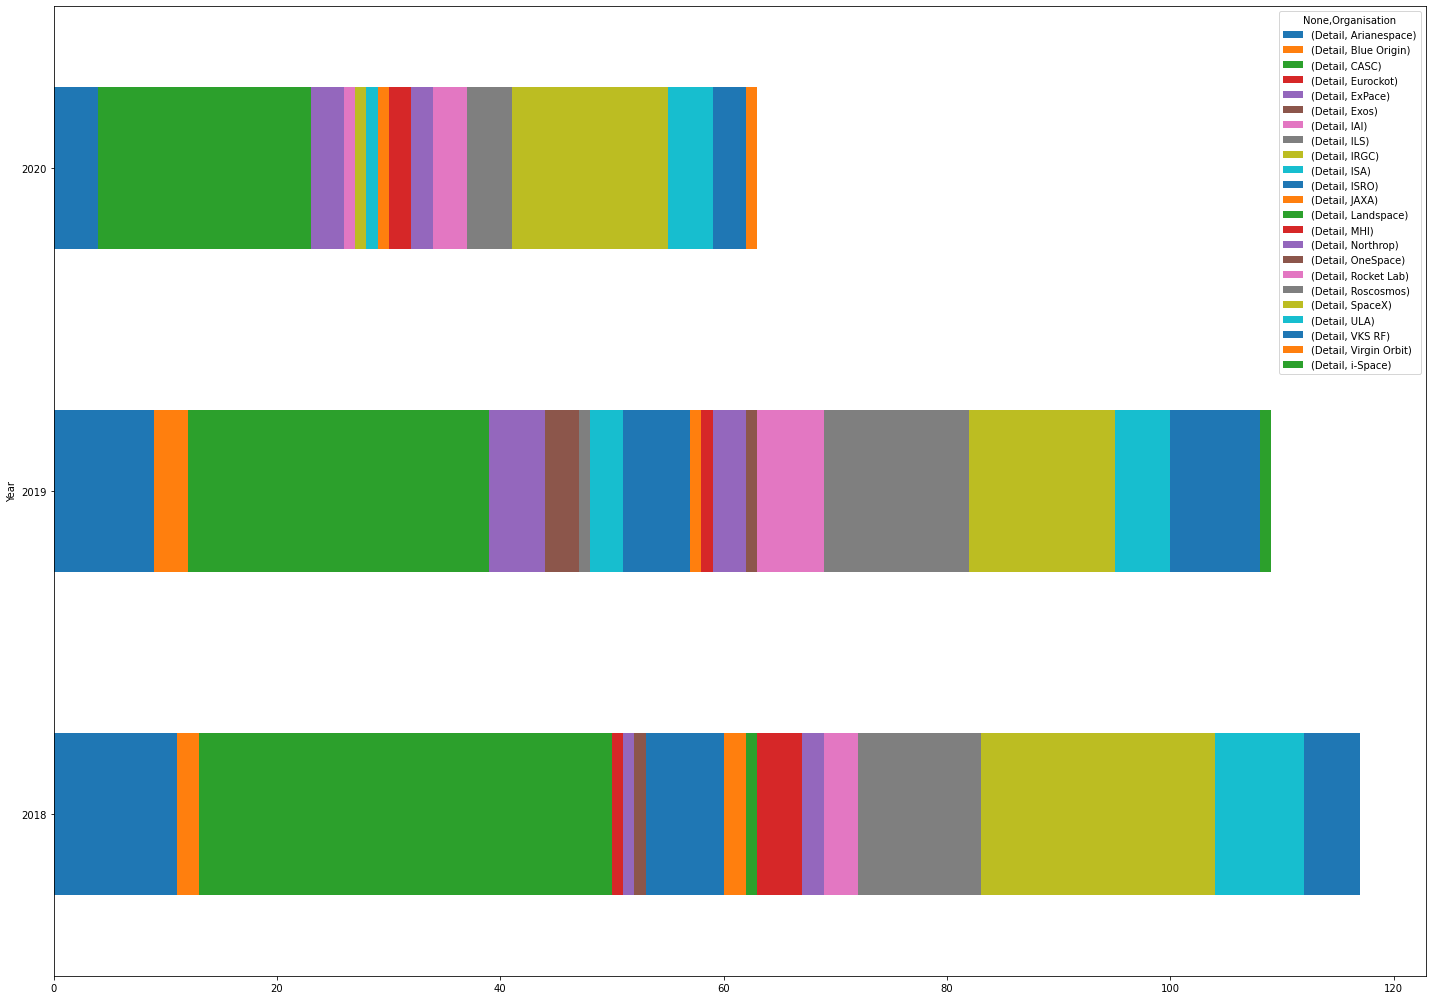

In [84]:
dfp = clean_data[clean_data.Year <= 2020][2018 <= clean_data.Year].pivot_table(index='Year',
                                                                               columns='Organisation',
                                                                               values=['Detail'],
                                                                               aggfunc='count')

dfp.plot(kind='barh',
         subplots=False,
         rot=0,
         figsize=(20, 14),
         legend=True,
         ylabel='Launches',
         stacked=True
       )

plt.tight_layout()